In [33]:
from tqdm import tqdm
import matplotlib.pyplot as plt 
import numpy as np  
import os
from Bio import SeqIO        
import pandas as pd           
import multiprocessing        
from functools import partial 
import pandas as pd
from tqdm import tqdm
import numpy as np
import seaborn as sns
from IPython.display import Image
import matplotlib.pyplot as plt
import os
import pickle as pkl

# Libraries from differential Expression Analysis
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
from pydeseq2.utils import load_example_data

import plotly.express as px
import plotly.offline as pyo

<pre>
1. Getting TF_Genes.txt (motif data)
2. Getting PPI data of each TF in TF_Genes
3. Mapping TF ids to Ensemble ID
</pre>

# 1. Constructing Intial Network Construction

In [34]:
iterlimit= -1

In [35]:
precomputed = 0
pathos=os.getcwd()
pathos

'/Users/anwer/Desktop/Gene_Regulatory_Network_ROSMAP/code'

In [36]:
def reduceSequence(sequence):
    seq=sequence[:1250]#since start is tss-1000, then we take the 2000bp upstream 
    return seq

In [37]:
def return_final_seq(fasta_sequences,geneCorr, start_index):
    finalSeq = ''
    namelist = []
    for fasta in tqdm(fasta_sequences):
        name, sequence = fasta.id, str(fasta.seq)
        try:
            new_sequence = reduceSequence(sequence)
        except:
            new_sequence = sequence
        name = name[start_index:]
        
        boolInd = np.in1d(geneCorr.iloc[:,3],name)
        name = geneCorr.iloc[boolInd,20].values[0] # 0 for other genes and 1 for curated_predicted
        interName = np.intersect1d(name, namelist)
        if interName.size == 0 and isinstance(name, str):
            namelist.append(name)

        else:
            continue
        try:
            name = '>' + name.split('.')[0]
        except:
            print(name)
        finalSeq = finalSeq + name + '\n' + new_sequence + '\n'
    
    return finalSeq,namelist

In [38]:
input_file ='./t2t_assembly/cat_gene_sequence.fasta'
output_file='./t2t_assembly/output/t2t_TSS1000_TSS1000_cat.fasta'
geneCorr = pd.read_csv('./t2t_assembly/cat_gene_info.csv', sep = '\t')

fasta_sequences = SeqIO.parse(open(input_file),'fasta')

/var/folders/ld/fhtyx4qs4mg6bw9chm___tsh0000gn/T/ipykernel_1500/2477752569.py:3: DtypeWarning:

Columns (23,36) have mixed types. Specify dtype option on import or set low_memory=False.



In [11]:
geneCorr.iloc[:,20]

In [14]:


finalSeq,namelist = return_final_seq(fasta_sequences,geneCorr,start_index = 44)

if precomputed==0:
    # save file
    with open(output_file, 'w') as file:
        file.write(finalSeq)

234903it [1:02:34, 62.56it/s]


In [39]:
output_file ='./t2t_assembly/output/t2t_TSS1000_TSS1000_cat.fasta'
fasta_sequences = SeqIO.parse(open(output_file),'fasta')
l = []
for fasta in tqdm(fasta_sequences):
    l.append(fasta.id)
    x = 1
   
    

60340it [00:00, 192437.60it/s]


# 2. Checking overlapping of Genes between sequences and count matrix

In [40]:
count_matrix = pd.read_csv('../ROSMAP_DATA/ROSMAP_all_counts_matrix.txt', sep = '\t')

In [ ]:
count_matrix.drop(index = count_matrix.index[:4], inplace=True)

count_matrix

In [42]:
m = []
for i in l:
    try:
        m.append(i.split('.')[0])
    except:
        m.append(i)

In [43]:
m[0:5]

['ENSG00000239945',
 'ENSG00000286448',
 'ENSG00000235146',
 'ENSG00000234986',
 'ENSG00000268663']

In [44]:
k = []
for i in count_matrix.feature:
    try:
        k.append(i.split('.')[0])
    except:
        k.append(i)

In [45]:
os.chdir(pathos)
len(set(k).intersection(set(m)))

56461

# 3. FIMO 

In [15]:
os.chdir(pathos)
print(pathos)
os.chdir('./Regulatory_Prior_Network_Data/PWMs')
for file in tqdm(os.listdir()):
    df=pd.read_csv(file,sep='\t')
    df=df.iloc[:,1:]
    os.chdir(pathos)
    os.chdir('./t2t_assembly/output/convPWMs')
    df.to_csv(file, header=False, index=False, sep='\t')
    os.chdir(pathos)

    os.chdir('./t2t_assembly/PWMs')
os.chdir(pathos)


/Users/anwer/Desktop/Gene_Regulatory_Network_ROSMAP/code


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5597/5597 [00:26<00:00, 215.03it/s]


In [18]:
os.chdir(pathos)
os.chdir('./t2t_assembly/output/convPWMs')
finalTfList = []


for file in tqdm(os.listdir()):
    bashCommand = "/Users/anwer/meme/libexec/meme-5.5.2/matrix2meme <" + file + "> " + file + ".meme"
    res=os.system(bashCommand)
    if res != 0:
        print(file)
    else:
        finalTfList.append(file[:-4])

  0%|▏                                                                                                                                                                                                                        | 6/5601 [00:00<06:57, 13.39it/s]

M10303_1.94d.txt


 15%|████████████████████████████████                                                                                                                                                                                       | 834/5601 [00:56<05:04, 15.64it/s]Error: Expected 2 elements on line 1 but got 9.
Died at /Users/anwer/meme/libexec/meme-5.5.2/matrix2meme line 117, <STDIN> line 3.
 15%|████████████████████████████████                                                                                                                                                                                       | 836/5601 [00:56<05:13, 15.18it/s]

.DS_Store


 18%|██████████████████████████████████████▏                                                                                                                                                                               | 1000/5601 [01:07<05:30, 13.94it/s]Error: Motif position 8 summed to zero.
Died at /Users/anwer/meme/libexec/meme-5.5.2/matrix2meme line 117, <STDIN> line 19.
 18%|██████████████████████████████████████▎                                                                                                                                                                               | 1002/5601 [01:08<05:24, 14.17it/s]

M10257_1.94d.txt


 19%|█████████████████████████████████████████▋                                                                                                                                                                            | 1090/5601 [01:14<05:21, 14.02it/s]Error: Motif position 7 summed to zero.
Died at /Users/anwer/meme/libexec/meme-5.5.2/matrix2meme line 117, <STDIN> line 23.
 19%|█████████████████████████████████████████▋                                                                                                                                                                            | 1092/5601 [01:14<05:20, 14.05it/s]

M07141_1.94d.txt


 21%|█████████████████████████████████████████████                                                                                                                                                                         | 1180/5601 [01:20<05:04, 14.54it/s]Error: Motif position 11 summed to zero.
Died at /Users/anwer/meme/libexec/meme-5.5.2/matrix2meme line 117, <STDIN> line 22.
 21%|█████████████████████████████████████████████▏                                                                                                                                                                        | 1182/5601 [01:20<05:11, 14.20it/s]

M06403_1.94d.txt


 39%|███████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                  | 2191/5601 [02:33<04:13, 13.47it/s]Error: Motif position 15 summed to zero.
Died at /Users/anwer/meme/libexec/meme-5.5.2/matrix2meme line 117, <STDIN> line 41.
 39%|███████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                  | 2195/5601 [02:34<04:13, 13.42it/s]

M10277_1.94d.txt


 59%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                       | 3318/5601 [03:55<02:54, 13.09it/s]Error: Motif position 7 summed to zero.
Died at /Users/anwer/meme/libexec/meme-5.5.2/matrix2meme line 117, <STDIN> line 45.
 59%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                       | 3322/5601 [03:55<03:07, 12.14it/s]

M10283_1.94d.txt


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 4234/5601 [04:59<01:33, 14.61it/s]Error: Motif position 15 summed to zero.
Died at /Users/anwer/meme/libexec/meme-5.5.2/matrix2meme line 117, <STDIN> line 50.
 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 4236/5601 [04:59<01:35, 14.26it/s]

M07127_1.94d.txt


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 4436/5601 [05:13<01:19, 14.63it/s]Warning: Element 0 is not a number.
Error: Expected either the row or column count to be the alphabet size 4 but got 9 by 1.
Died at /Users/anwer/meme/libexec/meme-5.5.2/matrix2meme line 117, <STDIN> line 2.
 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 4438/5601 [05:13<01:23, 13.87it/s]

M07333_1.94d.txt.meme


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 4804/5601 [05:41<01:01, 13.03it/s]Error: Motif position 10 summed to zero.
Died at /Users/anwer/meme/libexec/meme-5.5.2/matrix2meme line 117, <STDIN> line 32.
 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 4806/5601 [05:41<01:00, 13.14it/s]

M07090_1.94d.txt


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 4842/5601 [05:44<00:55, 13.60it/s]Error: Motif position 12 summed to zero.
Died at /Users/anwer/meme/libexec/meme-5.5.2/matrix2meme line 117, <STDIN> line 28.
 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 4844/5601 [05:44<00:56, 13.36it/s]

M10282_1.94d.txt


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 5549/5601 [06:39<00:03, 14.39it/s]Error: Motif position 15 summed to zero.
Died at /Users/anwer/meme/libexec/meme-5.5.2/matrix2meme line 117, <STDIN> line 25.
 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 5551/5601 [06:39<00:03, 14.45it/s]

M10278_1.94d.txt


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5601/5601 [06:43<00:00, 13.89it/s]


In [21]:
finalTfList[0:5]

['M07333_1.94d',
 'M09604_1.94d',
 'M02720_1.94d',
 'M05336_1.94d',
 'M09432_1.94d']

In [22]:
os.chdir(pathos)

In [ ]:
import pandas as pd
tf = pd.read_csv('./Regulatory_Prior_Network//Regulatory_Prior_Network_Data/Human_TF_MotifList_v_1.01.csv',dtype = str)
tf

In [10]:
tf[tf['Best Motif(s)? (Figure 2A)'] == 'TRUE' ]

In [94]:
#tf = pd.read_csv('./Regulatory_Prior_Network_Data/TF_Information_all_motifs_plus.txt',sep='\t')
#tf
'AHR' in tf['HGNC symbol'].tolist()

True

In [72]:
tf.columns

Index(['Ensembl ID', 'HGNC symbol', 'Motif evidence', 'Motif ID', 'Motif type',
       'Motif source', 'CIS-BP ID', 'Best Motif(s)? (Figure 2A)'],
      dtype='object')

In [81]:
precomputed = 0
if precomputed==0:
    # read TF motif table to select the "best" motif per TF
    indTF  =np.in1d(tf.iloc[:,6],finalTfList)
    tff    =tf
    tf     =tf.iloc[indTF,:]
    initTF =tf.iloc[0,1]
    tflist, tfflist =[],[]
    tflist.append(tf.iloc[0,6])
    tfflist.append(initTF)
    tfFound=0
    for i in range(tf.shape[0]):
        newTF = tf.iloc[i, 1]
        if tfFound==1 and initTF==newTF:
            continue
        else:
            if initTF!=newTF:
                if initTF != newTF and tfFound==0:
                    tflist.append(tf.iloc[i, 6])
                    tfflist.append(tf.iloc[i, 1])
                tfFound=0
                initTF =newTF
            if tf.iloc[i,7]==True:
                tflist.append(tf.iloc[i,6])
                tfflist.append(tf.iloc[i, 1])
                tfFound=1

In [82]:
print(tflist[0:10])
print(tfflist[0:10])

['M08490_1.94d', 'M09315_1.94d', 'M06439_1.94d', 'M06439_1.94d', 'M06440_1.94d', 'M08464_1.94d', 'M05559_1.94d', 'M05562_1.94d', 'M01298_1.94d', 'M06442_1.94d']
['ENSG00000267281', 'ENSG00000264668', 'ENSG00000106546', 'ENSG00000063438', 'ENSG00000160224', 'ENSG00000180318', 'ENSG00000156150', 'ENSG00000052850', 'ENSG00000227059', 'ENSG00000169083']


In [83]:
'T' in tfflist

False

In [84]:
len(tfflist)

1149

In [29]:
!pwd

/Users/anwer/Desktop/Gene_Regulatory_Network_ROSMAP/code


In [ ]:
os.chdir(pathos)
import re
if precomputed==0:
    # put pwms in the same file
    os.chdir('./t2t_assembly/output/convPWMs')
    finalMeme = 'MEME version 5.5.2\n\nALPHABET= ACGT\n\nstrands: + -\n\nBackground letter frequencies (from uniform background):\nA 0.25000 C 0.25000 G 0.25000 T 0.25000 \n\n'
    k=0
    finalTFName=[]
    for i,j in tqdm(enumerate(range(len(tflist)))):
        try:
            file = open(tflist[i] + '.txt.meme', 'r')
            k    = k+1
            finalTFName.append(tfflist[i])
            data = file.read()
            start = re.search("letter-probability", data).start()
            finalMeme = finalMeme +'MOTIF ' + tfflist[i] + data[start-1:]
            
            file.close()
            
        except:
            print("TF not found")
    print(finalMeme)
    # save file
    os.chdir(pathos)
    os.chdir('./t2t_assembly/output/convPWMs')
    with open('allTFs.meme', 'w') as file:
        file.write(finalMeme)

    # save TFs
    with open("tfNames.txt", "w") as f:
        for s in finalTFName:
            f.write(str(s) +"\n")


1149it [00:05, 209.77it/s]

In [310]:
# Run through python py file  (python main.py)
'''

os.chdir(pathos)
os.chdir('./Regulatory_Prior_Network_Data/output/convPWMs')
tfNames=[]

with open("tfNames.txt", "r") as f:
  for line in f:
    tfNames.append(str(line.strip()
                       
os.chdir(pathos)
geneNames  = []
fasta_sequences = SeqIO.parse(open('/Users/anwer/Desktop/github_repo/Gene_Regulatory_Network_ROSMAP/Regulatory_prior_network/data/t2t_TSS1000_TSS1000_cat.fasta'),'fasta')
for fasta in tqdm(fasta_sequences):
        name, sequence = fasta.id, str(fasta.seq)
        geneNames.append(name)

nTFs       = len(tfNames)
print(len(geneNames))
os.chdir(pathos)
'''

'AC023509.3'

In [266]:
regmatpval=pd.read_csv('/Users/anwer/Desktop/Gene_Regulatory_Network_ROSMAP/code/Regulatory_prior_Network/Regulatory_prior_Network_Data/fimo_output/regMatpval0.000005.csv',header=0,index_col=0)
tresh=1e-5

In [267]:
regmatpval[(regmatpval>0) & (regmatpval <= tresh)]=1
regmatpval[(regmatpval > tresh) & (regmatpval < 1)] =0


In [9]:
regmatpval

(1, 60000000)

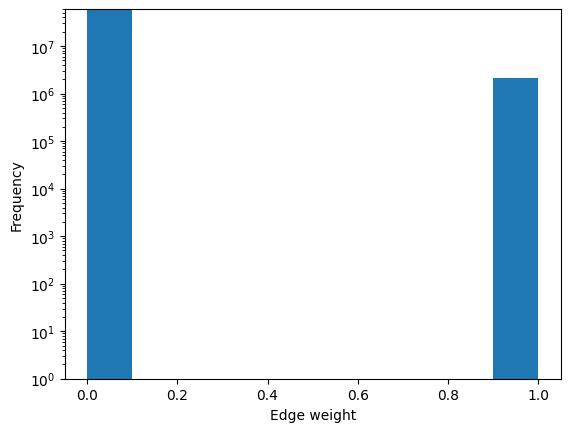

In [269]:
plt.hist(regmatpval.values.flatten())
plt.yscale('log', nonpositive='clip')
plt.ylabel('Frequency')
plt.xlabel('Edge weight')
plt.ylim([1,6*10**7])

In [270]:
density=((regmatpval == 1).sum(axis=1).sum())/(regmatpval.shape[0]*regmatpval.shape[1])
regmatpval.isnull().values.any()

False

In [271]:
density

0.03146638154028824

In [ ]:
regmatpval

In [273]:
regmatpval.index

Index(['AC023509.3', 'AC138696.1', 'AHR', 'AHRR', 'AIRE', 'ALX1', 'ALX3',
       'ALX4', 'ANHX', 'AR',
       ...
       'ZSCAN22', 'ZSCAN23', 'ZSCAN26', 'ZSCAN29', 'ZSCAN30', 'ZSCAN31',
       'ZSCAN4', 'ZSCAN5A', 'ZSCAN5C', 'ZSCAN9'],
      dtype='object', length=1149)

In [ ]:
regmatpval.columns

In [275]:
x = []
for i in tqdm(regmatpval.index):
    for j in regmatpval.columns:
        if regmatpval.loc[i,j] != 0:
            x.append([i,j])       

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1149/1149 [06:09<00:00,  3.11it/s]


In [279]:
x[0:10]

[['AC023509.3', 'ENSG00000228327'],
 ['AC023509.3', 'ENSG00000237491'],
 ['AC023509.3', 'ENSG00000188290'],
 ['AC023509.3', 'ENSG00000187608'],
 ['AC023509.3', 'ENSG00000234396'],
 ['AC023509.3', 'ENSG00000171612'],
 ['AC023509.3', 'ENSG00000285752'],
 ['AC023509.3', 'ENSG00000282872'],
 ['AC023509.3', 'ENSG00000142684'],
 ['AC023509.3', 'ENSG00000181773']]

In [280]:
regmatpval.shape

(1149, 60340)

In [281]:
len(x)/(1149*60340)

0.03146638154028824

In [282]:
lst_1 = []
lst_2 = []
lst_3 = []
for i in tqdm(x):
    lst_1.append(i[0])
    lst_2.append(i[1])
    lst_3.append(1)
    

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2181585/2181585 [00:00<00:00, 2876254.30it/s]


In [283]:
df = pd.DataFrame(list(zip(lst_1, lst_2,lst_3)),
               columns =['TF', 'Genes','Edge'])

In [284]:
df.head()

,TF,Genes,Edge
0,AC023509.3,ENSG00000228327,1
1,AC023509.3,ENSG00000237491,1
2,AC023509.3,ENSG00000188290,1
3,AC023509.3,ENSG00000187608,1
4,AC023509.3,ENSG00000234396,1


In [285]:
len(set(df.TF))

993

In [ ]:
df[df.TF == 'T']

In [287]:
df = df[['TF','Genes','Edge']]

In [288]:

os.chdir('/Users/anwer/Desktop/Gene_Regulatory_Network_ROSMAP/code/')
!pwd

/Users/anwer/Desktop/Gene_Regulatory_Network_ROSMAP/code


In [290]:
df = df.replace({'AC023509.3': 'ATF7-NPFF','AC138696.1':'ZFP41-2','HKR1':'ZNF875','VDR':'CYP27B1','T':'TBXT'})
df.to_csv('./t2t_assembly/T2T_assembly_GRN_input_Data/TF_Genes.txt', sep = '\t', index = False)

In [291]:
df = pd.read_csv('./t2t_assembly/T2T_assembly_GRN_input_Data/TF_Genes.txt', sep = '\t')
df.head()

,TF,Genes,Edge
0,ATF7-NPFF,ENSG00000228327,1
1,ATF7-NPFF,ENSG00000237491,1
2,ATF7-NPFF,ENSG00000188290,1
3,ATF7-NPFF,ENSG00000187608,1
4,ATF7-NPFF,ENSG00000234396,1


## 4.1 Mapping FIMO output TFs' symbol to ensemble ID 

In [292]:
l = list(set(df.TF.values))
len(l)

993

In [293]:
from gprofiler import GProfiler

gp = GProfiler(return_dataframe=True)
df_ensemble = gp.orth(organism='hsapiens',
            query=l,
            target='mmusculus')

In [294]:
df_ensemble

,incoming,converted,ortholog_ensg,n_incoming,n_converted,n_result,name,description,namespaces
0,EBF4,ENSG00000088881,ENSMUSG00000053552,1,1,1,Ebf4,early B cell factor 4 [Source:MGI Symbol;Acc:M...,"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE"
1,YBX3,ENSG00000060138,ENSMUSG00000030189,2,1,1,Ybx3,Y box protein 3 [Source:MGI Symbol;Acc:MGI:213...,"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE"
2,KLF16,ENSG00000129911,ENSMUSG00000035397,3,1,1,Klf16,Kruppel-like factor 16 [Source:MGI Symbol;Acc:...,"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE"
3,TCF4,ENSG00000196628,ENSMUSG00000053477,4,1,1,Tcf4,transcription factor 4 [Source:MGI Symbol;Acc:...,"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE"
4,ZBTB6,ENSG00000186130,ENSMUSG00000066798,5,1,1,Zbtb6,zinc finger and BTB domain containing 6 [Sourc...,"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE"
...,...,...,...,...,...,...,...,...,...
1075,ZNF182,ENSG00000147118,ENSMUSG00000054737,989,1,1,Zfp182,zinc finger protein 182 [Source:MGI Symbol;Acc...,"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE"
1076,ZNF81,ENSG00000197779,N/A,990,1,1,N/A,N/A,"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE"
1077,ZNF322,ENSG00000181315,ENSMUSG00000046351,991,1,1,Zfp322a,zinc finger protein 322A [Source:MGI Symbol;Ac...,"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE"
1078,STAT2,ENSG00000170581,ENSMUSG00000040033,992,1,1,Stat2,signal transducer and activator of transcripti...,"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE"


In [ ]:
df_ensemble = df_ensemble[['incoming','converted']]
df_ensemble = df_ensemble.drop_duplicates()
df_ensemble.reset_index(drop = True, inplace = True)
df_ensemble


In [296]:
df_ensemble[df_ensemble.converted == 'N/A']

,incoming,converted
53,DUX1,N/A
115,DUX3,N/A
681,ZFP41-2,N/A


In [297]:
df_ensemble.loc[681,]

incoming     ZFP41-2
converted        N/A
Name: 681, dtype: object

In [298]:
df_ensemble.loc[681,'converted'] = 'ENSG00000181638'
df_ensemble[df_ensemble.converted == 'N/A']

,incoming,converted
53,DUX1,N/A
115,DUX3,N/A


In [299]:
df_ensemble = df_ensemble[df_ensemble.converted != 'N/A']
df_ensemble.reset_index(drop = True, inplace = True)
df_ensemble


,incoming,converted
0,EBF4,ENSG00000088881
1,YBX3,ENSG00000060138
2,KLF16,ENSG00000129911
3,TCF4,ENSG00000196628
4,ZBTB6,ENSG00000186130
...,...,...
992,ZNF182,ENSG00000147118
993,ZNF81,ENSG00000197779
994,ZNF322,ENSG00000181315
995,STAT2,ENSG00000170581


In [300]:
df_ensemble.incoming.value_counts()[0:20]

incoming
ZNF547     3
FOXP1      2
HSFY1      2
ZNF263     2
DDIT3      2
BATF3      1
ZNF705G    1
SKOR2      1
KLF13      1
POU1F1     1
AHRR       1
EBF4       1
ZNF787     1
ZBTB7B     1
FOXD1      1
NR3C1      1
SP5        1
RORB       1
NKX2-6     1
ZNF680     1
Name: count, dtype: int64

In [301]:
df_ensemble[df_ensemble.incoming == 'ZNF547']

,incoming,converted
627,ZNF547,ENSG00000152433
628,ZNF547,ENSG00000196459
629,ZNF547,ENSG00000256060


In [302]:
df_ensemble.drop(labels = [628,629], inplace=True,axis = 0)
df_ensemble = df_ensemble.reset_index(drop=True)
df_ensemble[df_ensemble.incoming == 'ZNF547']

/var/folders/ld/fhtyx4qs4mg6bw9chm___tsh0000gn/T/ipykernel_1500/2118634447.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,incoming,converted
627,ZNF547,ENSG00000152433


In [303]:
df_ensemble[df_ensemble.incoming == 'HSFY1']

,incoming,converted
927,HSFY1,ENSG00000169953
928,HSFY1,ENSG00000172468


In [304]:
df_ensemble.drop(labels = 927, inplace=True,axis = 0)
df_ensemble = df_ensemble.reset_index(drop=True)
df_ensemble[df_ensemble.incoming == 'HSFY1']

,incoming,converted
927,HSFY1,ENSG00000172468


In [305]:
df_ensemble.incoming.value_counts()[0:4]

incoming
FOXP1     2
ZNF263    2
DDIT3     2
ZNF787    1
Name: count, dtype: int64

In [306]:
df_ensemble[df_ensemble.incoming == 'ZNF263']

,incoming,converted
430,ZNF263,ENSG00000006194
431,ZNF263,ENSG00000290183


In [307]:
df_ensemble.drop(labels = 431, inplace=True,axis = 0)
df_ensemble = df_ensemble.reset_index(drop=True)
df_ensemble[df_ensemble.incoming == 'ZNF263']

,incoming,converted
430,ZNF263,ENSG00000006194


In [308]:
df_ensemble[df_ensemble.incoming == 'DDIT3']

,incoming,converted
967,DDIT3,ENSG00000175197
968,DDIT3,ENSG00000285133


In [309]:
df_ensemble.drop(labels = 968, inplace=True,axis = 0)
df_ensemble = df_ensemble.reset_index(drop=True)
df_ensemble[df_ensemble.incoming == 'DDIT3']

,incoming,converted
967,DDIT3,ENSG00000175197


In [310]:
df_ensemble[df_ensemble.incoming == 'FOXP1']

,incoming,converted
326,FOXP1,ENSG00000114861
327,FOXP1,ENSG00000285708


In [311]:
df_ensemble.drop(labels = 327, inplace=True,axis = 0)
df_ensemble = df_ensemble.reset_index(drop=True)
df_ensemble[df_ensemble.incoming == 'FOXP1']

,incoming,converted
326,FOXP1,ENSG00000114861


In [313]:
len(set(df_ensemble.incoming))

991

In [314]:
len(set(df_ensemble.converted))

990

In [315]:
df_ensemble.converted.value_counts()[0:4]

converted
ENSG00000181638    2
ENSG00000088881    1
ENSG00000215372    1
ENSG00000173041    1
Name: count, dtype: int64

In [316]:
df_ensemble[df_ensemble.converted =='ENSG00000181638']

,incoming,converted
345,ZFP41,ENSG00000181638
675,ZFP41-2,ENSG00000181638


In [317]:
df_ensemble.to_csv('./t2t_assembly/T2T_assembly_GRN_input_Data//TF_symbol_to_ensembleid.csv')

In [318]:
def return_ensemble(symbol):
    try:
        return df_ensemble[df_ensemble.incoming == symbol]['converted'].values[0]
    except:
        print(symbol)
        return np.nan

In [ ]:
df['TF_Ensemble'] = df['TF'].apply(return_ensemble)

In [321]:
df = df.dropna()
len(set(df.TF))

991

In [324]:
df.to_csv('./t2t_assembly/T2T_assembly_GRN_input_Data/TF_Genes.txt', sep = '\t', index = False)

# 5. Filtering expression data and tf-genes(LEFT) (Not done for single sample)(skip below code and follow All_Data.ipynb)

In [262]:
expression_data = pd.read_csv('./data_rosmap_count_matrix/Count_Matrix_TPM.csv')

In [427]:
x = set(expression_data.feature)
len(x)

60725

In [441]:
y = list(set(df.Genes))
len(y)

60340

In [439]:
len(x.intersection(y))

56461

In [434]:
y-x

{'ENSG00000290292'}

In [446]:
def yes_or_no(feature):
    if feature in y:
        return 1
    else:
        return 0

In [447]:
expression_data['Yes'] = expression_data.feature.apply(yes_or_no)

In [ ]:
expression_data = expression_data[expression_data['Yes'] == 1]
expression_data.drop(columns=['Yes'], axis = 1)

In [450]:
x = list(set(expression_data.feature))
len(x)

56461

In [451]:
def yes_or_no(feature):
    if feature in x:
        return 1
    else:
        return 0

In [452]:
df['Yes'] = df.Genes.apply(yes_or_no)

In [7]:
df = df[df['Yes'] == 1]
df.drop(columns=['Yes'], axis = 1)
df

In [455]:
y = set(expression_data.feature)

In [456]:
x-y

{'ENSG00000290292'}

In [459]:
df = df[df.TF != 'ENSG00000290292']

In [460]:
x = set(df.TF)
len(x)

1015

In [461]:
x-y

set()

In [462]:
x = set(df.Genes)
len(x)

56461

In [463]:
x -y

set()

In [464]:
df_tf_genes_filtered = df
expression_data_filtered = expression_data

# 6 PPI

In [257]:
df_PPI = pd.read_csv('./t2t_assembly/T2T_assembly_GRN_input_Data//PPI_latest_only_TF_with_ensembleid.csv')

In [6]:
df_PPI.drop(columns=['Unnamed: 0'], axis = 1, inplace= True)
df_PPI

In [259]:
len(set(df_PPI.TF_name).intersection(set(df_PPI.Interacting_Partner)))

781

In [260]:
len(set(df.TF).intersection(set(df_PPI.TF_name)))

0

In [5]:
set(df_PPI.TF_name) - set(df.TF)

In [485]:
df_PPI = df_PPI[df_PPI.TF_name != 'ENSG00000290292']
df_PPI = df_PPI[df_PPI.Interacting_Partner != 'ENSG00000290292']

In [487]:
 set(df_PPI.TF_name) - set(df.TF)

set()

In [488]:
len(set(df_PPI.TF_name))

986

In [4]:
df_PPIa

In [513]:
 x = set(df.TF) - set(df_PPI.TF_name) 

In [514]:
len(x)

28

In [495]:
li = []
for i in x:
    li.append([i,i,1])

In [519]:
fake_df = pd.DataFrame(columns=['TF_name','Interacting_Partner','Score'])
for i in li:
   
    fake_df.loc[len(fake_df)] = i
    

In [520]:
fake_df.head(2)

,TF_name,Interacting_Partner,Score
0,ENSG00000187815,ENSG00000187815,1
1,ENSG00000144792,ENSG00000144792,1


In [521]:
df_PPI.head(2)

,TF_name,Interacting_Partner,Score
0,ENSG00000005073,ENSG00000253293,1
1,ENSG00000005073,ENSG00000075891,1


In [522]:
df_PPI = pd.concat([df_PPI,fake_df])

In [523]:
set(df.TF) - set(df_PPI.TF_name) 

set()

In [525]:
len(set(df_PPI.TF_name) )

1015

In [3]:
df_PPI


In [2]:
expression_data_filtered

In [1]:
df_tf_genes_filtered.drop(columns=['Yes'], axis = 1 ,inplace = True)
df_tf_genes_filtered

In [532]:
df_tf_genes_filtered.to_csv('./t2t_assembly/T2T_assembly_GRN/Curated_TF_Genes.txt', sep = '\t', index = False)

In [551]:
expression_data_filtered.drop(columns = ['Yes'],axis = 1, inplace = True)
expression_data_filtered.to_csv('./t2t_assembly/T2T_assembly_GRN/curated_count_matrix_TPM.csv', index = False)

/var/folders/ld/fhtyx4qs4mg6bw9chm___tsh0000gn/T/ipykernel_42425/4039566355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expression_data_filtered.drop(columns = ['Yes'],axis = 1, inplace = True)


In [533]:
df_PPI.to_csv('./t2t_assembly/T2T_assembly_GRN/Curated_PPI.csv', index = False)